In [231]:
import pandas as pd 

movies = pd.read_csv("./data/movies_metadata.csv", low_memory=False)

In [232]:
movies.columns.unique()

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

Drop movies which doesn't have imbd index

In [233]:
#identify nan values
ind_movies = movies.index
ind_nan_movies = ind_movies[movies["imdb_id"].isnull()]
print(ind_nan_movies)
print(movies["imdb_id"].isnull().sum())


Int64Index([ 8966, 13757, 13821, 17382, 17510, 18959, 19322, 20806, 20937,
            21916, 22987, 23744, 33753, 36955, 40809, 41832, 45070],
           dtype='int64')
17


In [236]:
movies_droped = movies.drop(ind_nan_movies)
movies_droped.reset_index(inplace= True)
movies_droped.rename(columns={'id':'tmdbId'}, inplace=True)
print("Length of movies after droping {} and length of movies before droping {}".format(len(movies_droped), len(movies)))

Length of movies after droping 45449 and length of movies before droping 45466


In [8]:
#check that droping is working
len(movies) - len(movies_droped) ==  movies["imdb_id"].isnull().sum()

True

Remove rows that have 0 imdb_id

In [241]:
ind_remoal = movies_droped.loc[movies_droped['imdb_id'] == '0'].index
movies_droped = movies_droped.drop(ind_remoal)
movies_droped.reset_index(inplace=True)

Match images with the movies in dataset

In [191]:
import os 
from os import listdir
from os.path import isfile, join
path = "./poster_downloads/"
images_file_path = [f for f in listdir(path) if isfile(join(path, f))]

ranaming of images files

In [6]:
# test = images_file_path[1]
# t = test[test.find('_')+1:]
# new_test = path+test
# os.rename(new_test, path+t)


In [7]:
# for i in range(len(images_file_path)):
#     test = images_file_path[i]
#     t = test[test.find('_')+1:]
#     new_test = path+test
#     try:
#       os.rename(new_test, path+t)
#     except FileNotFoundError:
#         pass

In [8]:
# new_test = path+test

# os.rename(new_test, path+t)


Create the dataframe for the images

In [192]:
len(images_file_path)

9078

In [183]:
test = [len(movie) for movie in movies_droped["imdb_id"]]
for t in range (len(test)): 
    if test[t] != 9:
        print(t, test[t])

In [193]:
images_file_path_processed = []
for path in images_file_path:
    target = path[:len(path) - 4]

    ans = 7 - len(target)
    images_file_path_processed.append("tt"+("0" * ans) + target)

In [194]:
print("Test if the length are the same: ", len(images_file_path_processed) == len (images_file_path))
test = [len(movie) for movie in images_file_path_processed]
for t in range (len(test)): 
    if test[t] != 9:
        print(t, test[t])

images_file_path_processed[0:10]

Test if the length are the same:  True


['tt0100046',
 'tt0100049',
 'tt0100050',
 'tt0100054',
 'tt0100065',
 'tt0100087',
 'tt0100112',
 'tt0100114',
 'tt0100129',
 'tt0100133']

In [214]:
images_dataset = pd.DataFrame({"imdb_id" :images_file_path_processed, "path" : images_file_path })

In [215]:
images_dataset

,imdb_id,path
0,tt0100046,100046.jpg
1,tt0100049,100049.jpg
2,tt0100050,100050.jpg
3,tt0100054,100054.jpg
4,tt0100065,100065.jpg
...,...,...
9073,tt0099857,99857.jpg
9074,tt0099938,99938.jpg
9075,tt0099939,99939.jpg
9076,tt0099969,99969.jpg


Combine metadata with the links file

In [15]:
links = pd.read_csv("data/links.csv")

Remove null index of tmdb column 

In [45]:
ind_links = links.index
ind_nan_links = ind_links[links["tmdbId"].isnull()]
print(ind_nan_links)
print(links["tmdbId"].isnull().sum())

Int64Index([  140,   598,   708,   709,   718,   756,   757,   778,   806,
              844,
            ...
            24491, 24591, 24597, 24608, 24620, 24673, 24775, 24802, 28570,
            35278],
           dtype='int64', length=219)
219


In [46]:
links_droped = links.drop(ind_nan_links)
links_droped.reset_index(inplace= True)

In [49]:
len(links)- len(links_droped)

219

Isolate the field that you are interested from the metadata table

In [242]:
movies_metadata = movies_droped[["tmdbId", "imdb_id", "title", "overview"]]

In [243]:
movies_metadata.dtypes

tmdbId      object
imdb_id     object
title       object
overview    object
dtype: object

Change data types to make the merge possible

In [254]:
movies_metadata["tmdbId"] = pd.to_numeric(movies_metadata["tmdbId"])

c:\Users\nikol\anaconda3\envs\PTVQA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [251]:
links_droped["tmdbId"] = pd.to_numeric(links_droped["tmdbId"])

In [255]:
movies_metadata.dtypes

tmdbId       int64
imdb_id     object
title       object
overview    object
dtype: object

In [253]:
links_droped.dtypes

index        int64
movieId      int64
imdbId       int64
tmdbId     float64
dtype: object

In [256]:
movies_metadata

,tmdbId,imdb_id,title,overview
0,862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...
...,...,...,...,...
45441,439050,tt6209470,Subdue,Rising and falling between a man and woman.
45442,111109,tt2028550,Century of Birthing,An artist struggles to finish his work while a...
45443,67758,tt0303758,Betrayal,"When one of her hits goes wrong, a professiona..."
45444,227506,tt0008536,Satan Triumphant,"In a small town live two brothers, one a minis..."


In [258]:
links_droped.drop("index", axis=1, inplace=True)

In [259]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
45838,176269,6209470,439050.0
45839,176271,2028550,111109.0
45840,176273,303758,67758.0
45841,176275,8536,227506.0


Start merging

In [260]:
#merge the links with metadata
links_metadata_dataset = movies_metadata.merge(links, on='tmdbId', how='inner')

In [261]:
links_metadata_dataset

,tmdbId,imdb_id,title,overview,movieId,imdbId
0,862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",1,114709
1,8844,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,2,113497
2,15602,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...,3,113228
3,31357,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",4,114885
4,11862,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...,5,113041
...,...,...,...,...,...,...
45503,439050,tt6209470,Subdue,Rising and falling between a man and woman.,176269,6209470
45504,111109,tt2028550,Century of Birthing,An artist struggles to finish his work while a...,176271,2028550
45505,67758,tt0303758,Betrayal,"When one of her hits goes wrong, a professiona...",176273,303758
45506,227506,tt0008536,Satan Triumphant,"In a small town live two brothers, one a minis...",176275,8536


In [266]:
#merge the links_metadata with the images 
final_dataset = links_metadata_dataset.merge(images_dataset, on='imdb_id', how='inner')

In [267]:
final_dataset

,tmdbId,imdb_id,title,overview,movieId,imdbId,path
0,862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",1,114709,114709.jpg
1,8844,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,2,113497,113497.jpg
2,15602,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...,3,113228,113228.jpg
3,31357,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",4,114885,114885.jpg
4,11862,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...,5,113041,113041.jpg
...,...,...,...,...,...,...,...
9020,148558,tt0022670,Betty Boop's Museum,Koko is recruiting customers for a 50 cent sig...,164631,22670,22670.jpg
9021,50855,tt0019640,Angora Love,Stanley and Oliver are adopted by a runaway go...,164989,19640,19640.jpg
9022,142918,tt0024676,Woman of Tokyo,"Ryoichi and Chikako, brother and sister, live ...",165067,24676,24676.jpg
9023,97716,tt0014440,Scaramouche,A law student becomes an outlaw French revolut...,165083,14440,14440.jpg


In [268]:
final_dataset.to_pickle("data.pkl")

In [174]:
import pandas as pd 
test = pd.read_pickle("../data_after_process.pkl")

In [175]:
import matplotlib.pyplot as plt

(array([ 906., 2225., 1893., 2144.,  851.,  404.,  328.,  124.,  110.,
          40.]),
 array([  2. ,  19.8,  37.6,  55.4,  73.2,  91. , 108.8, 126.6, 144.4,
        162.2, 180. ]),
 <BarContainer object of 10 artists>)

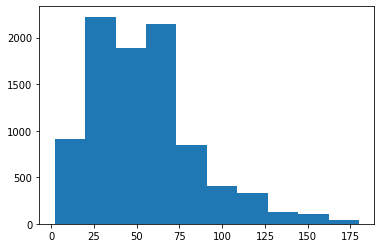

In [176]:
plt.hist([len(str(i).split(" ")) for i in test["overview"]])

In [177]:
lengths_descr = [len(str(t)) for t in test["overview"]]
for i, l in enumerate(lengths_descr):
    if l < 5:
        print(i, l)

In [155]:
# test.to_pickle("../data_after_process.pkl")